In [1]:
import random
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter

# Set random seed for reproducibility
random.seed(4)
np.random.seed(4)

def generate_random_grid(grid_size, entropy):
    threshold = 0.5 * (1 + entropy)
    grid = np.random.rand(grid_size, grid_size) < threshold
    return grid.astype(int)

def CID(data):
    dictionary = {'0': 1, '1': 2}
    code = 3
    result = []
    buffer = ''
    total_compressed_bits = 0
    current_bit_size = math.floor(1 + math.log2(code))

    for bit in data:
        bit = str(bit)
        symbol = buffer + bit
        if symbol in dictionary:
            buffer = symbol
        else:
            result.append(dictionary[buffer])
            total_compressed_bits += current_bit_size

            dictionary[symbol] = code
            code += 1
            if code > 2 ** current_bit_size:
                current_bit_size += 1
            buffer = bit
    if buffer:
        result.append(dictionary[buffer])
        total_compressed_bits += current_bit_size

    original_bits = len(data)
    ratio = total_compressed_bits / original_bits
    return ratio

def shannon_entropy(grid):
    bits = grid.flatten()
    counts = np.bincount(bits, minlength=2)
    total = counts.sum()
    if total > 0:
        probabilities = counts / total
        entropy = -np.sum(probabilities[probabilities > 0] * np.log2(probabilities[probabilities > 0]))
    else:
        entropy = 0
    return entropy

grid_sizes = [10, 20, 30, 40, 50, 100, 500, 1000]
colors = plt.cm.plasma(np.linspace(0, 1, len(grid_sizes)))

# Calculate all the data first
all_data = []

for idx, grid_size in enumerate(grid_sizes):
    print(f'now on grid size {grid_size}')
    comp_rat = []
    sh = []
    for _ in range(1000):
        entropy = random.random()
        grid = generate_random_grid(grid_size, entropy)
        flattened = grid.flatten()
        CR = CID(flattened)
        Shannon = shannon_entropy(grid)
        comp_rat.append(CR)
        sh.append(Shannon)
    
    # Store the calculated data
    all_data.append((comp_rat, sh, colors[idx]))


print('new data generated')

now on grid size 10
now on grid size 20
now on grid size 30
now on grid size 40
now on grid size 50
now on grid size 100
now on grid size 500
now on grid size 1000
new data generated


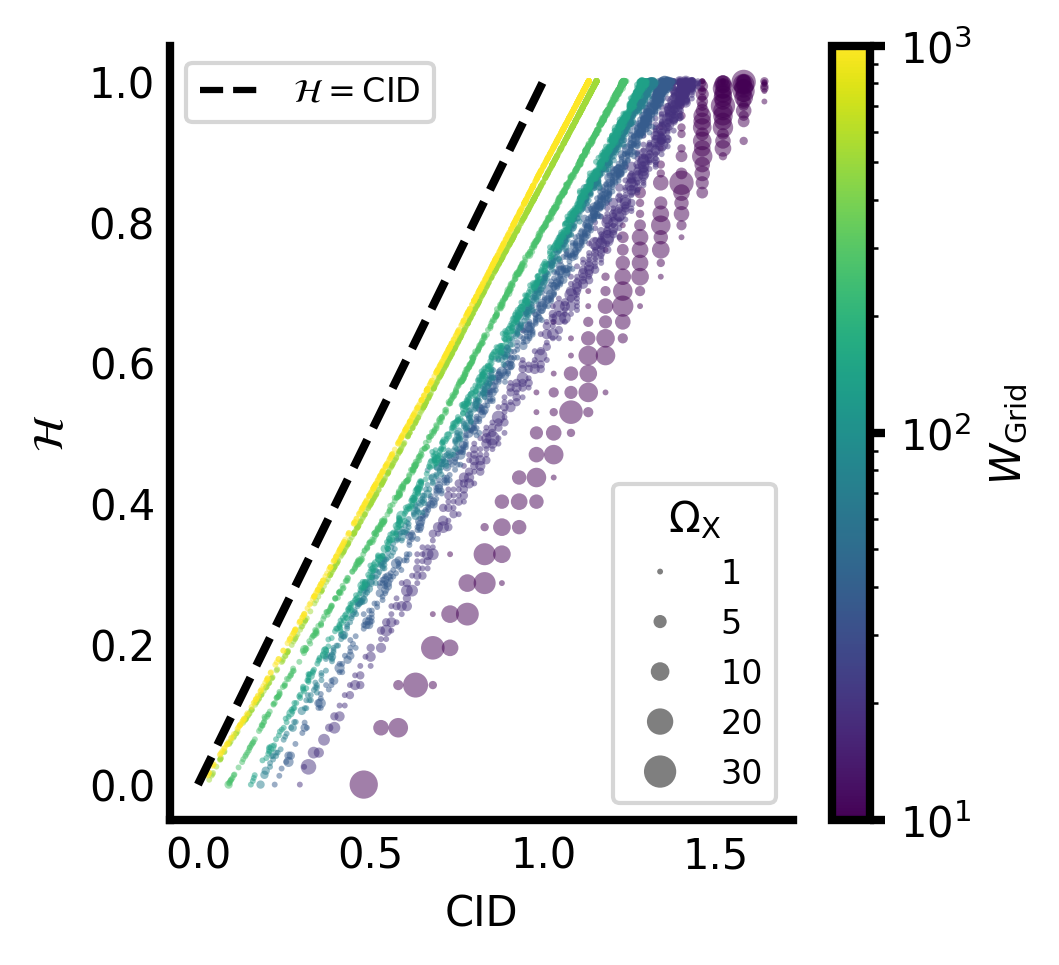

In [2]:
# Now plot everything in one go
plt.figure(figsize=(3.35, 3.35), dpi=300)
plt.tick_params(direction='in', left=True, bottom=True, width=2, size=0)  # Remove tick marks by setting size=0

max_cid = 0
bubble_scale = 2

# Determine the original scalar values used to generate the plasma colors
plasma_positions = np.linspace(0, 1, len(grid_sizes))

# Convert these positions to corresponding viridis colors
viridis_colors = [plt.cm.viridis(pos) for pos in plasma_positions]

for idx, (comp_rat, sh, _) in enumerate(all_data):
    max_cid = max(max_cid, max(comp_rat))
    point_counts = Counter(zip(comp_rat, sh))
    points, sizes = zip(*point_counts.items())
    comp_rat, sh = zip(*points)
    sizes = [bubble_scale * s for s in sizes]
    plt.scatter(comp_rat, sh, s=sizes, c=[viridis_colors[idx]]*len(comp_rat), alpha=0.5, edgecolors='none')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

import matplotlib.ticker as ticker

# Create a colorbar with logarithmic scaling and using 'viridis' color scheme
norm = mcolors.LogNorm(vmin=min(grid_sizes), vmax=max(grid_sizes))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())

# Set custom ticks at powers of 10, you can modify the range as needed
tick_locations = [10**i for i in range(int(np.log10(min(grid_sizes))), int(np.log10(max(grid_sizes))) + 1)]
cbar.set_ticks(tick_locations)

cbar.set_label('$W_{\\mathrm{Grid}}$', fontsize=10)

# Change the linewidth of the colorbar outline
cbar.outline.set_linewidth(2)

# Change the tick width
cbar.ax.tick_params(width=2)

# Adding a bubble size legend consistent with the color scheme
for idx, size in enumerate([1, 5, 10, 20, 30]):
    plt.scatter([], [], s=bubble_scale*size, c='k', alpha=0.5, edgecolors='none', label=size)

# Create and add the first legend to the plot
legend1 = plt.legend(
    scatterpoints=1, 
    frameon=True, 
    labelspacing=0.5,  # Reduce the spacing between labels
    handleheight=1.0,  # Reduce the height of the handles
    title='$\\Omega_{\\mathrm{X}}$', 
    fontsize=8,
    loc = 'lower right'
)
plt.gca().add_artist(legend1)

# Adding a small legend for the dotted black line
line = plt.plot([], [], 'k--', label='$\\mathcal{H}=\\mathrm{CID}$')[0]
plt.legend([line], ['$\\mathcal{H}=\\mathrm{CID}$'], loc='upper left', fontsize=8)

plt.xlabel('CID', fontsize=10)
plt.ylabel('$\\mathcal{H}$', fontsize=10)
plt.grid(False)

# Remove the top and right spines, and set the width of remaining spines to 2
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.show()


### Check

Here, we make sure that our CID is accurate, using a compressed string we calculated by hand using LZW.

In [9]:
import random
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter

# Set random seed for reproducibility
random.seed(4)
np.random.seed(4)

def generate_random_grid(grid_size, entropy):
    threshold = 0.5 * (1 + entropy)
    grid = np.random.rand(grid_size, grid_size) < threshold
    return grid.astype(int)

def CID(data):
    dictionary = {'0': 0, '1': 1} #using the simplest possible dictionary
    code = 2
    result = []
    buffer = ''
    total_compressed_bits = 0
    current_bit_size = 1 #start with a single bit to encode tokens 0b0 or 0b1

    for bit in data:
        bit = str(bit)
        symbol = buffer + bit
        if symbol in dictionary:
            buffer = symbol
        else:
            result.append(dictionary[buffer])
            total_compressed_bits += current_bit_size

            dictionary[symbol] = code
            code += 1
            if code > 2 ** current_bit_size:
                current_bit_size += 1
            buffer = bit
    if buffer:
        result.append(dictionary[buffer])
        total_compressed_bits += current_bit_size

    original_bits = len(data)
    ratio = total_compressed_bits / original_bits
    return ratio

def shannon_entropy(grid):
    bits = grid.flatten()
    counts = np.bincount(bits, minlength=2)
    total = counts.sum()
    if total > 0:
        probabilities = counts / total
        entropy = -np.sum(probabilities[probabilities > 0] * np.log2(probabilities[probabilities > 0]))
    else:
        entropy = 0
    return entropy


CID('001011100101011101')

1.8333333333333333

In [4]:
len('000010110011000111000011001000001')/len('001011100101011101')

1.8333333333333333